### Assignment-5

### UIN 733000826

In [4]:
#Q-No.6:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Data importing
df = pd.read_csv('dataFile.csv', sep=',')
df.head(10)

,x1,x2,y
0,0,1,4
1,5,1,5
2,15,2,20
3,25,5,14
4,35,11,32
5,45,15,22
6,50,25,90
7,55,34,38
8,60,35,43
9,70,38,45


In [5]:
# Statistical values of the data
df.describe()

,x1,x2,y
count,11.000000,11.000000,11.000000
mean,40.454545,18.818182,33.000000
std,27.152766,15.911117,24.665766
min,0.000000,1.000000,4.000000
25%,20.000000,3.500000,17.000000
50%,45.000000,15.000000,32.000000
75%,57.500000,34.500000,44.000000
max,85.000000,40.000000,90.000000


##### (a) Fit a linear regression model and print estimated model parameters, coefficient of determination and check the significance of model parameters

In [6]:
import statsmodels.api as sm

#defining response variable
y = df['y']

#defining predictor variables
x = df[['x1', 'x2']]

#adding constant to predictor variables
x = sm.add_constant(x)

#fitting linear regression model
model = sm.OLS(y, x).fit()

#model parameters

print(model.params)
print("==============================================================================")

print("R Squared value for the model_1:",model.rsquared)
print(model)

print("==============================================================================")
#Display model summary
print(model.summary())

const    9.324222
x1       0.347996
x2       0.510026
dtype: float64
R Squared value for the model_1: 0.4957235253511115
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     3.932
Date:                Sun, 06 Nov 2022   Prob (F-statistic):             0.0647
Time:                        01:16:11   Log-Likelihood:                -46.578
No. Observations:                  11   AIC:                             99.16
Df Residuals:                       8   BIC:                             100.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

#### Significance of the liner regression


#### Significance

- A high value of the P>|t| metric demonstrates that feature coefficient is likely to be 0, thereby not contributing significantly towards the prediction of target variable Y.

#### From the above summary table:

- For the feature x1, the P>|t| column demonstrates that there is a ~66% probability that the coefficient for x1 is 0.34. It is very likely that x1 feature does not contribute towards the prediction of the variable Y.
- For the feature x2, the P>|t| column demonstarates that there is a ~70% probability that the coefficient for x2 is 0.51. It is very likely that the x2 feature does not contribute towards the prediction of the variable Y.
- Here, x1 and x2 both parameters have a low t value. Hence, both are less likely to predict the target variable.
- We are getting a low R-square value which represents there is no corelation between x1, x2 and the target variable.
- We are getting a positive (F-statistic value) which represents that there is no linear co-relation between the target variable Y and X1, x2.

##### (b) Check the nomality of residuals by providing suitable graphical interpretation

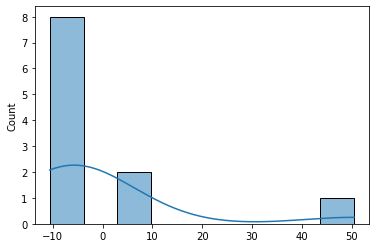

In [7]:
# Checking Normality of residuals values

residuals = model.resid
residMean = np.mean(residuals)
sns_plot = sns.histplot(x = residuals, kde=True)

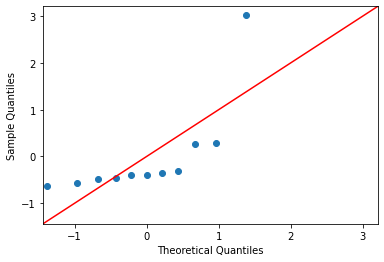

In [8]:
# Q-Q plot for the verification of the residuals distribution
fig = sm.qqplot(residuals, fit=True, line = '45')

##### From the above plots, we can determine that the distribution for the data is not normal as the hist plot is one-sided highly skewed not forming a normal distribution curve and the Q-Q plot data points do not align with the straight line.

#### (c) Are there any outliers in the dataset? If yes, remove them and repeat step (a), (b), and (c) to fit a new model for the dataset without outliers.

In [23]:
# Calculation of total outliers in the dataframe

def find_outliers(df, colm):
  Q3 = np.quantile(df[colm], 0.75)
  Q1 = np.quantile(df[colm], 0.25)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 - 1.5*IQR

  outliers = df[((df[colm]<(Q1-1.5*IQR)) | (df[colm]>(Q3+1.5*IQR)))]

  return (outliers,len(outliers))

for colms in df.columns:
  if df[colms].dtype in ["int64","float64"]:
    outlr, l = find_outliers(df,colms)
    if(len(outlr)> 0):
      print("Outlier information")
      print(outlr)

Outlier information
   x1  x2   y
6  50  25  90


From the above output, we get one outlier for the Target variable Y , that data point needs to be dropped. After dropping the outlier, the model is rebuilt.

<AxesSubplot:xlabel='y'>

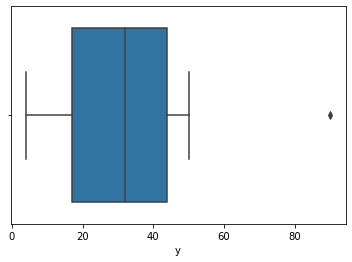

In [10]:
#Outlier boxplot
import seaborn as sns
sns.boxplot(x='y',data=df)

The above boxplot displays the single outlier in Y.

\- Rebuilding the model by dropping the outlier values

In [11]:
# dropping outliers 
df_drop = df.drop([outlr.index[0]])
df_drop

,x1,x2,y
0,0,1,4
1,5,1,5
2,15,2,20
3,25,5,14
4,35,11,32
5,45,15,22
7,55,34,38
8,60,35,43
9,70,38,45
10,85,40,50


##### Linear Regression Model after dropping Outlier 

In [12]:
# Statsmodel module implementation
import statsmodels.api as sm

#defining response variable
y = df_drop['y']

#define predictor variables
x = df_drop[['x1', 'x2']]

#X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.1)

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     38.11
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           0.000173
Time:                        01:16:12   Log-Likelihood:                -29.439
No. Observations:                  10   AIC:                             64.88
Df Residuals:                       7   BIC:                             65.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3305      3.393      1.866      0.1

### Significance

- A high value of the P>|t| metric demonstrates that feature coefficient is likely to be 0, thereby not contributing significantly towards the prediction of target variable Y.

#### From the above summary table:

- For the feature x1, the P>|t| column demonstrates that there is a ~11% probability that the coefficient for x1 is 0.39. It is likely that x1 feature may contribute towards the prediction of the variable Y.
- For the feature x2, the P>|t| column demonstarates that there is a ~45% probability that the coefficient for x2 is 0.29. It is very likely that the x2 feature does not contribute towards the prediction of the variable Y.
- We are getting a high R-square value which represents there is corelation between x1, x2 and the target variable.
- We are getting a low prob (F-statistic value very close to zero) which represents that there is linear co-relation between the target variable Y and X1, x2.

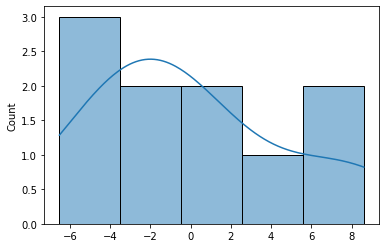

In [13]:
## Residual and Q-Q plot of Df, after dropping the outlier
residuals = model.resid
residMean = np.mean(residuals)
sns_plot = sns.histplot(x = residuals, kde=True)

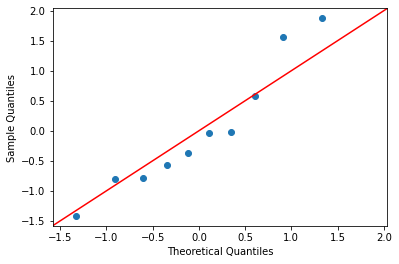

In [14]:
## Q-Q plot 

fig = sm.qqplot(residuals, fit=True, line = '45')

After dropping the outlier datapoint in Y, we can see that the distribution we are getting is very close to a normal distribution. The hist plot is a close representation of a normal distribution curve and the Q-Q plot data points are close to the straight line.

##### d) By using the outliers free data and the corresponding model, find the confidence range for predicted values of Y.

In [21]:
predicted = model.fittedvalues
print(predicted)
x_1 = model.model.exog # this is the observation matrix used to fit the data
covMatrixForParams = model.cov_params()
covMatrixForParams

0      6.627293
1      8.598000
2     12.836167
3     17.667835
4     23.389756
5     28.518175
7     38.097860
8     40.365318
9     45.196986
10    51.702611
dtype: float64


,const,x1,x2
const,11.509095,-0.456551,0.524224
x1,-0.456551,0.046528,-0.075896
x2,0.524224,-0.075896,0.135915


In [16]:
covMatrixForPredictedPts = np.matmul(x_1, np.matmul(covMatrixForParams, x_1.T))
varPredictedPts = np.diagonal(covMatrixForPredictedPts)
varPredictedLine = model.mse_resid
totVarPredicted = varPredictedLine + varPredictedPts
totSePredicted = np.sqrt(totVarPredicted)
print(totSePredicted)

from scipy.stats import t
alpha=0.05 # confidence interval for two-sided hypothesis
qt = 1 - (alpha/2)  # (0.25, 0.975) for a 2-sided 95% probability

tppf = t.isf(alpha/2.0, model.df_resid)

[6.54640276 6.22045958 6.04401211 6.13103606 6.02064062 6.21682317
 6.41191095 6.23018632 6.17074423 6.59795439]


In [17]:
interval_u = predicted + tppf * totSePredicted
interval_l = predicted - tppf * totSePredicted

In [18]:
from pandas.core.arrays import interval
y_pred = model.predict(x)
d = {'upper':interval_u,'lower':interval_l,'predicted values':y_pred}
df_result = pd.DataFrame(data=d)
print("----------------")
print(df_result)

----------------
        upper      lower  predicted values
0   22.107076  -8.852490          6.627293
1   23.307050  -6.111049          8.598000
2   27.127984  -1.455651         12.836167
3   32.165431   3.170238         17.667835
4   37.626309   9.153203         23.389756
5   43.218626  13.817724         28.518175
7   53.259620  22.936099         38.097860
8   55.097368  25.633268         40.365318
9   59.788478  30.605495         45.196986
10  67.304294  36.100928         51.702611


##### e) Use your model in (c) to predict   values when 
#####(x1, x2) = (1,2),(3,4),(5,6),(7,8),(9,10),(11,12),(13,14)

In [19]:
# Predicting model
d = {'x1': [1, 3, 5, 7, 9, 11, 13], 'x2': [2, 4,6,8,10,12,14]}
df_test = pd.DataFrame(data=d)

x = df_test[['x1','x2']]
x = sm.add_constant(x)

y_pred = model.predict(x)
d = {'x1':df_test.x1,'x2':df_test.x2,'predicted values':y_pred}
df_result = pd.DataFrame(data=d)
print("----------------")
print(df_result)

----------------
   x1  x2  predicted values
0   1   2          7.318186
1   3   4          8.699971
2   5   6         10.081756
3   7   8         11.463541
4   9  10         12.845326
5  11  12         14.227111
6  13  14         15.608896


In [20]:
df_test

,x1,x2
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10
5,11,12
6,13,14
